## Теория аппроксимации и интерполяции функций

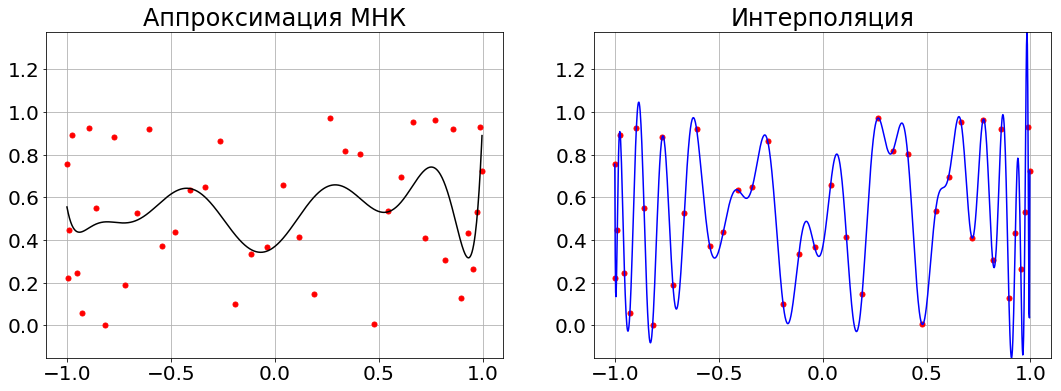

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
from scipy.interpolate import BarycentricInterpolator
# Количество точек
n = 40
# Задаём точки (неравномерная сетка для удобства)
x = np.cos(np.pi * np.linspace(-1,0., n+1, endpoint=False))
x = np.sort(x) #* np.pi * 2
# Задаём случайные значения в точках
y = np.random.rand(n+1) #np.sin(x) * (np.random.rand(n+1) * 0.4 + 1)
# p - массив коэффициентов многочлена
p = np.polyfit(x, y, 10)
# L - интерполяционный многочлен
L = BarycentricInterpolator(x,y)
# Вычисляем значения многочлена на подробной сетке и строим график
xx = np.linspace(np.min(x),np.max(x),1000)
yy = np.polyval(p, xx)
u_limit = np.max([np.max(yy), np.max(L(xx))])
d_limit = np.min([np.min(yy), np.min(L(xx))])
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 6))
ax1.set_ylim([d_limit, u_limit])
ax1.plot(x,y,'ro', ms = 5)
ax1.plot(xx, yy,'k-')
ax1.set_title('Аппроксимация МНК')
ax1.grid(True)
#
ax2.set_ylim([d_limit, u_limit])
ax2.plot(x,y,'ro', ms = 5)
ax2.plot(xx, L(xx), 'b-')
ax2.set_title('Интерполяция')
ax2.grid(True)

**Основная задача**

Для функции $f$ из  класса $F$ найти наилучшее *в некотором смысле* приближение $\phi \approx f$ (обычно $\phi$ комбинация "простых" функций)
- построение эффективного алгоритма вычисления приближения
- оценка ошибки в зависимости от свойств класса $F$ (гладкость, величина производных и т.п.)
- знакомые примеры:
    - Формула Тейлора
    - Ряды Фурье (в узком смысле, разложение по  $\sin x, \cos x$)

Два общих подхода:
- **Минимизационный подход**:

    Выбирается норма $\Vert \cdot \Vert$ на $F$ и ищется функция $\phi \in \Phi \subset F$, минимизирующая $\Vert f - \phi\Vert$
- **Интерполяционный подход**:

    Выбираются точки (узлы) $x_0, \ldots, x_n$ и ищется функция $\phi \equiv P$, удовлетворяющая *интерполяционным условиям*:
$$
P(x_i) = f(x_i), \; i = 0, 1, \ldots, n
$$


## Интерполяция

> **Определение**
>
> Обобщенным многочленом (полиномом) называется линейная комбинация следующего вида:
> $$P_k (x) = c_1\phi_0(x)+\dots+c_k\phi_k(x) = \sum^k_{j=0}c_j\phi_j(x),$$
> где $\phi_j, \; j = 0,\dots,k$ - система линейно независимых базисных функций, например:
> $$x^k, \quad sin(kx), \quad e^{kx}, \quad sh(kx), \quad \dots$$


Пусть для некторой неизвестной функции $f(x)$ известны её точные значения в наборе из $n+1$ точек  $x_0 < x_1 < \dots x_n$.

**Задача интерполяции** состоит в построении обобщенного многочлена $P_n(x)$ удовлетворяющего *условиям интерполяции* (проходящей через все точки $f(x_j)$):
$$\underline{P_n(x_j)=f(x_j), \quad j = 0,\dots,n}.$$

Условия интерполяции образуют систему для нахождения неизвестных коэффициентов:
$$
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \ldots & \phi_n(x_0) \\
\phi_0(x_1) & \phi_1(x_1) & \ldots & \phi_n(x_1) \\
\ldots & \ldots & \ddots & \ldots \\
\phi_0(x_n) & \phi_1(x_n) & \ldots & \phi_n(x_n) 
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
c_n
\end{bmatrix} = 
\begin{bmatrix}
f(x_0) \\
f(x_1) \\
\vdots \\
f(x_n)
\end{bmatrix}
$$
Условие линейной независимости $\{\phi_j(x)\}$ равносильно условию существования и единственности решения системы.


Простейшее решение, это соединить все точки прямыми линиями, что также будет удовлетворять условиям задачи, в таком случае интерполяция называется *кусочно-линейной*. Однако во многих случаях от искомой функции потребуется гладкость.

$$P(x)=\sum^n_{j=0}f(x_n)\phi_j(x)$$
Вид функций $\phi_j(x)$

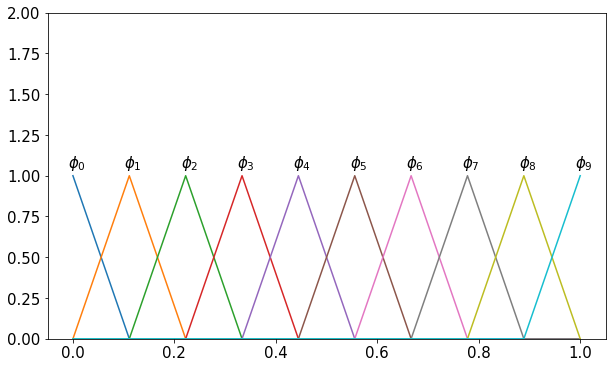

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,6))

n = 10
x = np.linspace(0,1,n)

def hat(x,i):
    y=x.copy()
    y[:i] = 0
    y[i + 1:] = 0
    y[i] = 1
    return y

for i in range(n):
    y=hat(x,i)
    plt.plot(x,y)
    plt.text(x[i] - 0.01, 1.05, r"$\phi_{}$".format(i))
plt.ylim([0, 2])
plt.show()

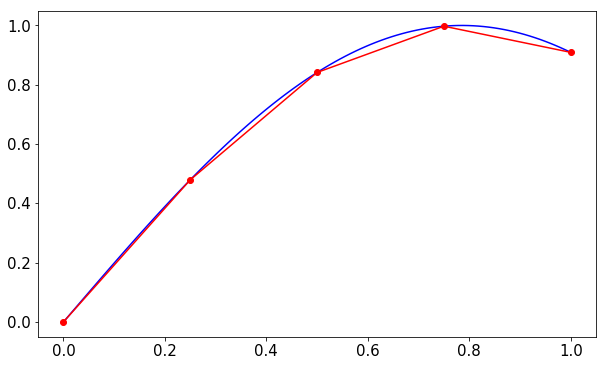

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,6))

n = 5
x = np.linspace(0,1,n)
x_fine = np.linspace(0,1,100)

f_n = np.sin(x / 0.5)

plt.plot(x_fine, np.sin(x_fine / 0.5), 'b')
plt.plot(x, f_n, 'r-o')
plt.show()

**Основные термины**
- $P_n(x)$ - интерполянт, интерполяционный многочлен
- $x_0 < x_1 < \dots x_n$ - узлы интерполяции или сетка
- $x_{j+1} - x_j = h = const, \; 0 \leq j \leq n$ - равномерная сетка

<!-- >**Теорема**
>
>Пусть заданы $n + 1$ различных узлов $x_0, x_1,…, x_n$, и значения функции в этих узлах $f(x_0), f(x_1), …, f(x_n)$. Тогда существует один и только один многочлен $P_n(x)$ степени не выше $n$, принимающий в узлах $x_k$ заданные значения $f(x_k)$. -->

### Интерполяция алгебраическими многочленами

$$P_n(x)=a_0+a_1x+a_2x^2+\dots+a_nx^n$$
Т.е. $\phi_j=x^j$

Для определения коэффициентов $a_0, a_1, \dots, a_n$ необходимо решить систему из $n+1$ уравнения

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_n
\end{bmatrix} =
\begin{bmatrix}
f(x_0) \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n)
\end{bmatrix}
$$
Определитель матрицы данной системы это определитель Вандермонда. Известно, что он отличен от нуля в случае различных узлов $x_0, x_1,…, x_n$. Однако, с ростом количества узлов, данная система становится плохо обусловленной.

### Интерполяционный многочлен в форме Лагранжа

Способ вычисления многочлена в точке

$$ \phi_j(x) \equiv l_j(x) = \prod_{k = 0, \, k \ne j}^n \frac{x - x_k}{x_j - x_k}$$

<!-- {\underset{x \ne x_j}{=} \frac{\prod_{k=0}^n (x - x_k)}{(x - x_j) \displaystyle\prod_{k=0, k \ne j} (x_j - x_k)}} -->

$$ L_n(x) = \sum_{j=0}^n f(x_j) l_j(x) $$

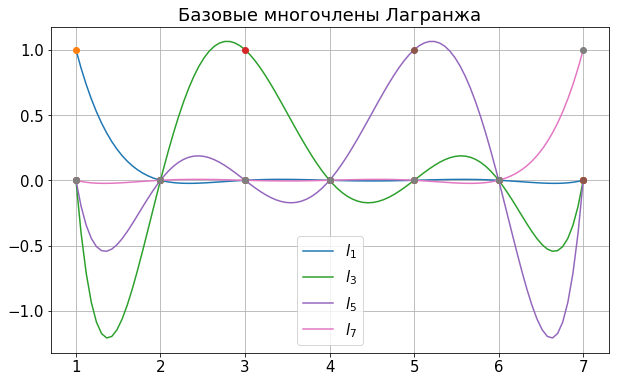

In [3]:
%matplotlib inline
from scipy.interpolate \
import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,6))

n = 7
for j in range(0, n, 2):
    xi = np.arange(n) + 1
    yi = np.zeros(n)
    yi[j] = 1
    lagrange = BarycentricInterpolator(xi,yi)

    x = np.linspace(1,n,100)
    y = lagrange(x)

    plt.plot(x, y, label = r"$l_{}$".format(j + 1))
    plt.plot(xi, yi, 'o')
plt.legend()
plt.title('Базовые многочлены Лагранжа')
plt.grid(True)

### Интерполяционный многочлен в форме Ньютона

#### Разделенные разности

- Значения $f(x_k)$ в узлах будем называть *разделенными разностями порядка 0*
- Для любой пары узлов $x_l,x_m$ введем *разделенные разности порядка 1*:
$$
f(x_l; x_m) = \frac{f(x_l) - f(x_m)}{x_l - x_m}
$$
- Реккурентно: разделенная разность порядка $k$:
$$
f(x_0;\ldots;x_k) = \frac{f(x_1;\ldots;x_k) - f(x_0;\ldots;x_{k-1})}{x_k - x_0}
$$

Интерполяционный многочлен можно также записать в форме Ньютона

$$
\begin{align*}
    L_n(x) = f(x_0) & + f(x_0; x_1) (x - x_0) \\
     & + f(x_0;x_1;x_2)(x-x_0)(x-x_1) +  \ldots \\
     & + f(x_0;x_1;\ldots;x_n) (x-x_0) \cdots (x - x_{n-1})
\end{align*}
$$

Для вычисления значений многочлена в форме Ньютона удобно использовать таблицу:
$$
\begin{align*}
\begin{array}{lllllll}
f(x_0) & & & & & & \\
 &\searrow & & & & & \\
f(x_1) &\rightarrow & f(x_0;x_1) & & & & \\
 & \searrow & & \searrow & & & \\
f(x_2) & \rightarrow & f(x_1;x_2) & \rightarrow & f(x_0;x_1;x_2) & & \\
 & \searrow & & \searrow & & \searrow & \\
f(x_3) & \rightarrow & f(x_2;x_3) & \rightarrow & f(x_1;x_2;x_3) & \rightarrow & f(x_0;x_1;x_2;x_3)
\end{array}
\end{align*}
$$

### Погрешность интерполяции
> **Теорема**
>
> Пусть $x_0, \ldots, x_n \in [a,b]$ и $f \in C^{n+1}[a,b]$. Тогда 
> $$ f(x) - P_n(x) = \frac{f^{(n+1)} \left(\xi(x)\right) }{(n+1)!} \omega(x), \quad \omega(x) = \prod_{k=0}^n (x-x_k) $$
> где $ \xi(x) \in \big[\min\{x, x_0, \ldots, x_n\}, \max\{x, x_0, \ldots, x_n\}\big]$
>


**Следствие**

Для равномерной сетки:
$$ h=\frac{b-a}{n}, \quad\quad |f(x) - P_n(x)|\leq \frac{h^{n+1}}{n+1}\max_{[a,b]}|f^{(n+1)}(\xi)|, \quad \xi \in [a,b]. $$

### Выбор узлов интерполяции

Оценка ошибки:
$$
\begin{align*}
    & |f(x) - P_n(x)| =  \bigg\lvert \frac{f^{(n+1)} \left(\xi(x)\right) }{(n+1)!} \prod_{k=0}^n (x-x_k)\bigg\rvert \le \\
    &  \frac{M_{n+1}}{(n+1)!} \boxed{\max_{[a,b]} \big| \prod_{k=0}^n (x-x_k) \big|}
\end{align*}
$$
Оптимизационная задача:
$$
\begin{align*}
    \min_{\{x_k\} \subset [a,b]} \max_{[a,b]} \big| \prod_{k=0}^n (x-x_k) \big|
\end{align*}
$$
Решение: многочлены Чебышёва

- $T_n(t) = \cos (n \arccos t), \; t \in [-1,1]$
- $T_0(t) = 1$, $T_1(t) = t$, при $n \ge 1$:
$$T_{n+1}(t) = 2 t T_n(t) - T_{n-1}, n = 1,2, \ldots$$

- Корни многочлена 
$$
t_{nj} = \cos \left( \frac{\pi}{2n} + \frac{\pi}{n} j\right), \; j = 0, \ldots, n-1
$$

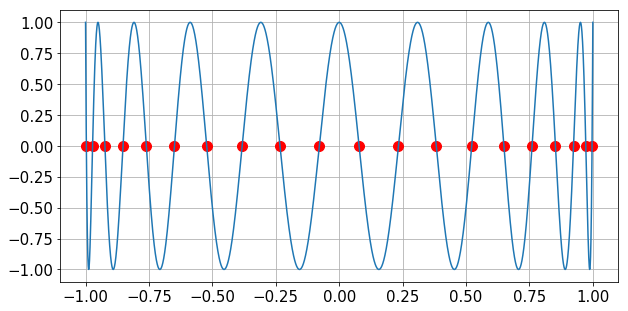

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
n = 20
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
xx = np.linspace(-1,1,4000)
fig, ax = plt.subplots(figsize = (10,5))
plt.plot(tn, np.zeros(n), 'ro', ms = 10)
plt.plot(xx, np.cos(n * np.arccos(xx)))
plt.grid(True)

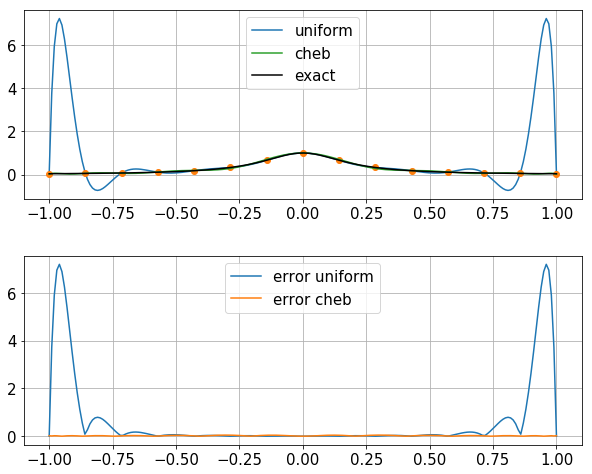

In [6]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 15})

# f = lambda x : np.sin(2 * x) * np.exp(-x)
f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n = 15 # 5, 20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)
# Chebyshev
j = np.arange(n)
xic = np.cos(np.pi/(2*n) + np.pi * j / n)
yic = f(xic)
Lnc = BarycentricInterpolator(xic, yic)
yc = Lnc(x)

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,8) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, yc, label = 'cheb')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.plot(x, np.abs(f(x) - yc), label = 'error cheb')
ax2.legend()
ax2.grid(True)
plt.subplots_adjust(hspace  = 0.3)

### Обусловленность интерполяционного процесса
Пусть значения в узлах заданы с ошибкой
$$\tilde{f}_j = f_j + \delta f_j, \; |\delta f_j| \le \delta_j \le \delta $$
$$ L_n(x, f+\delta f)=L_n(x,f)+L_n(x,\delta f)$$
Погрешность в значении многочлена:
$$
\begin{align*}
    & \lvert L_n(x, \tilde{f}) - L_n(x, f) \rvert = \lvert L_n(x, \delta f)\rvert = \\
    & \lvert \sum_{j} \delta f_j\,  l_j(x)\rvert \le \sum_j \delta_j |l_j(x)| \\
    & \Vert L_n(\tilde{f}) - L_n(f) \Vert \le \delta \max_{x \in [a,b]} \sum_j |l_j(x)| = \Lambda_n\delta 
\end{align*}
$$
С ростом количества узлов растет $\Lambda_n$.

Для алгебраической интерполяции ($\phi_k(x) = x^k$) в случае равномерно расположенных узлов доказана оценка
$$\frac{2^{n-3}}{(n-3/2)\sqrt{n-1}} < \Lambda_n < 2^{n-1}, \quad n \geq 4.$$
т.е. чувствительность результата интерполяции к погрешностям задания
функции в узлах резко возрастает с ростом $n$.

Если узлами интерполяции являются корни полинома Чебышёва, то
$$ L_n = \frac{2}{\pi}\ln{n}+1-\Theta_n, \quad 0 \leq \Theta_n \leq 1/4. $$
т.е. с ростом n константы растут очень медленно.

### Сходимость интерполяционного процесса

Для сеток Чебышёва

| Условия на $f$| Убывание ошибки |
| ----------- | ----------- |
| $\vert f(x)-f(y)\vert\leq L\vert x-y\vert$      | $E\rightarrow 0$  |
| $\nu \ge 1, \; f \in C^{\nu - 1}$, $\vert f^{(\nu)}\vert < V$  | $\displaystyle E \le \frac{4V}{\pi \nu (n - \nu)^\nu}$        |
| $f$ - аналитическая на $[-1, 1]$ | $E \le C^{-n}, C > 1$ |

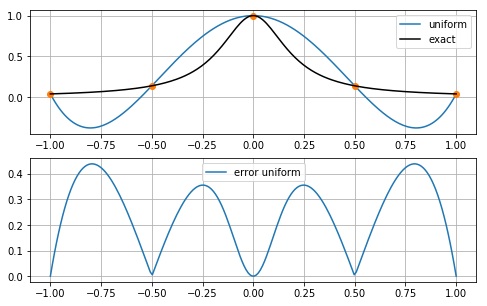

In [11]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt


f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n = 5 # 5,20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)


#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.legend()
ax2.grid(True)


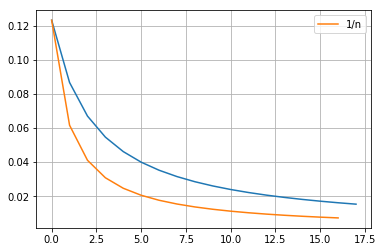

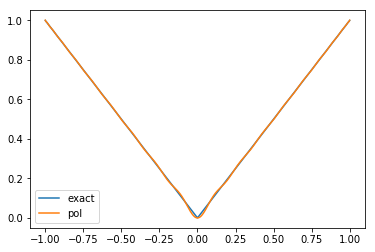

In [14]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
#
f = lambda x: np.abs(x)
xx = np.linspace(-1, 1, 1000)
error = []
for n in range(5, 41, 2):
    j = np.arange(n)
    xi = np.cos(np.pi/(2*n) + np.pi * j / n)
    yi = f(xi)
    Ln = BarycentricInterpolator(xi,yi)
    error.append(np.max(np.abs(Ln(xx) - f(xx))))

# plt.plot(xx, f(x),'k-')
plt.plot(error)
plt.plot(error[0]/np.arange(1,len(error)), 
         label = '1/n')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(xx, f(xx), label = 'exact')
plt.plot(xx, Ln(xx), label = 'pol')
plt.legend()

### Сплайны

Сплайн - это кусочно-многочленная функция $S$. 
- $a = x_0, \ldots, x_n = b$, $S_{[x_{k-1}, x_k]}$ - многочлен.
- Максимальная степень $m$ многочлена называется степенью сплайна.
- Если $S \in C^{k}[a,b]$, $k$ называется гладкостью сплайна.
- Разность $m - k$ называется дефектом сплайна.

##### Кубический сплайн
- $a = x_0, \ldots, x_n = b$, $f_k = f(x_k)$
$$
        \begin{align*}
        \Phi = \{\phi \in C^2[a,b]: \phi(x_k) = f_k, k = 0, 1, \ldots, n\}
        \end{align*}
$$
- $S(x) \in \Phi$ называется *интерполяционным кубическим сплайном*, если $\forall \; [x_{k-1}, x_k], k = \overline{1,n}$, $S$ - многочлен степени $\le 3$.
- $4n-2$ уравнения для коэффициентов:
    1. $2 + 2 (n-1) = 2n$ интерполяционных условия
    2. $(n-1)$ - непрерывность 1-й производной
    3. $(n-1)$ - непрерывность 2-й производной
- Дополнительные граничные условия:
    - $S''(x_0) = S''(x_n) = 0$ - естественный сплайн
    - $S'(x_0) = f'(x_0)$, $S'(x_n) = f'(x_n)$
    - $S'(x_0) =S'(x_0), S''(x_0) = S''(x_n)$ - периодичность

Естественный сплайн существует и единственен

> **Теорема**
>
> Пусть $f \in C^j[a,b]$, $1 \le j \le 4$, тогда 
> $$ \Vert f - S_n \Vert_{C[a,b]} = \mathcal{O}(h^j), \; h = \max_k h_k $$

### Многомерная интерполяция

![2D](./Comparison_of_1D_and_2D_interpolation-ru.svg.png)

![img](./img.png)